# Big Data / Open Data Roadmap
Possiamo trovare numerose fonti con Open Data utilizzabili con python per produrre una elaborazione che calcoli degli indici o evidenzi delle relazioni tra i dati.

Una volta evidenziate delle relazioni interessanti o degli indici è possibile valutare l'aggiunta di algoritmi per la previsione dei valori. 

La previsione avviene valutando i dati presenti, suddividendoli in set di training e di test e addestrando un modello. 
Esistono vari modelli:
- regressione lineare: per prevedere dati che sono in una relazione lineare
- regressione logistica: prevede la probabilità che un fatti avvenga oppure no
- xxx
- alberi di decisione
- random forest
- reti neurali

### Cosa va realizzato? Che forma ha il processo?
Uno o più script che sono eseguiti per leggere i dati, pulirli e renderli omogenei prima della loro analisi.

Abbiamo due alternative:
- Il processo può prendere più fonti dati sullo stesso tema e cercare di unirle, uniformarle, su una tabella (o struttura) comune. Es. combino dati ARPA di diverse regioni o nazioni che hanno formati leggermente diversi e a cui magari mancano delle informazioni.
- Il processo preleva più fonti dati dierse tra loro e le carica in più "tabelle" indipendenti. L'elaborazione o l'analisi mette in evidenza delle relazioni tra le diverse fonti. Es. carico dati di inquinamento ed evidenzio la localizzazione per città, poi cerco di sovrapporli con i dati ISTAT della popolazione per città. Li posso collegare a una mappa con dati o servizi che forniscono le coordinate di una citta a partire dal nome...


# 1. i Dati
Sono il punto di partenza e si possono prelevare in vari formati da vari siti (al limite kaggle per degli esempi). I formati possono essere per esempio:
- csv
- xls
- json
- parquet
- xml
- txt
- pdf
- html
- webservices che rispondono in txt, json o xml


### Caricare i dati in CVS
Carico di dati da CSV e ricavo info utili sui dati contenuti con info(), describe() e head()


In [172]:
import pandas as pd
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [174]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

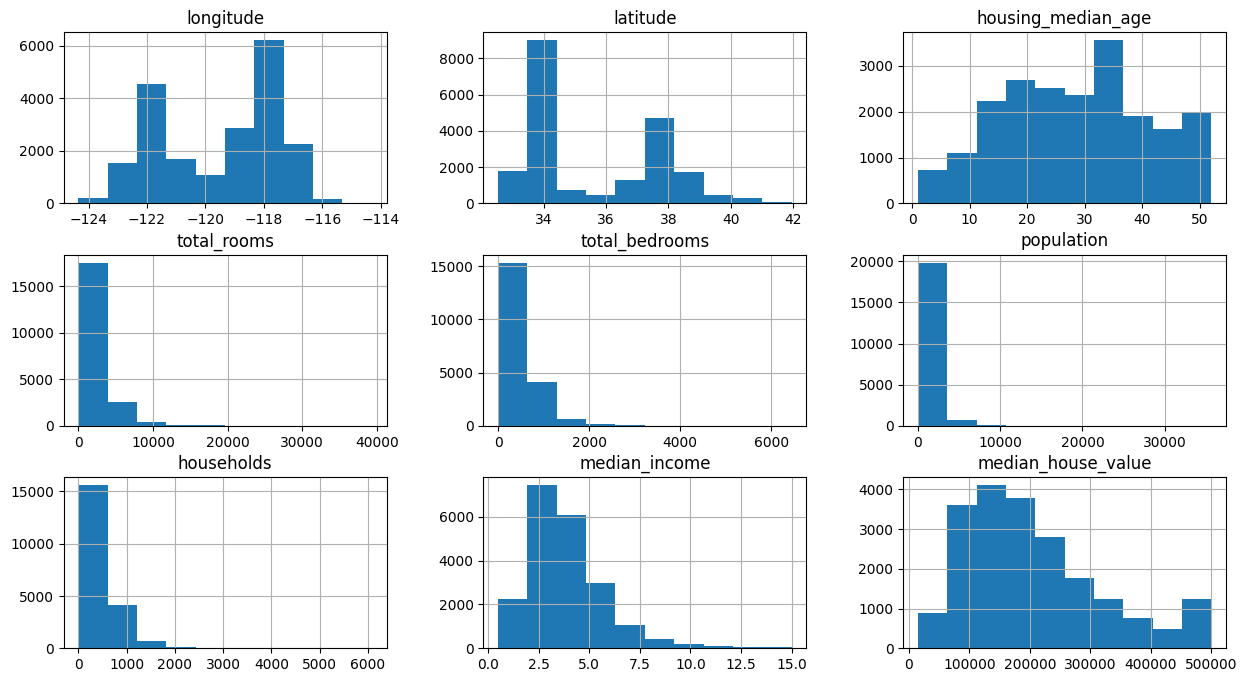

In [175]:
df.hist(figsize=(15,8))

<Axes: xlabel='latitude', ylabel='longitude'>

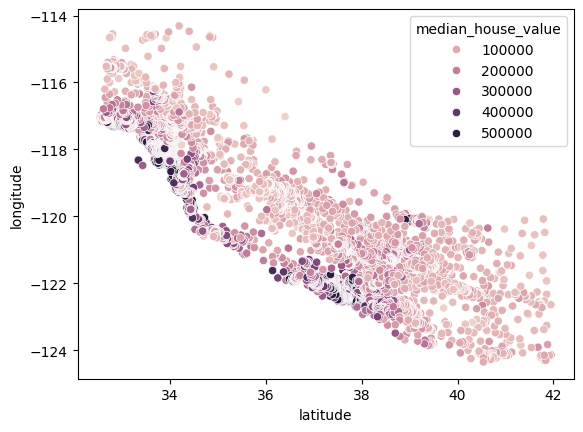

In [176]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=df, hue="median_house_value")
#, s=df["population"]/100)

<Axes: xlabel='latitude', ylabel='longitude'>

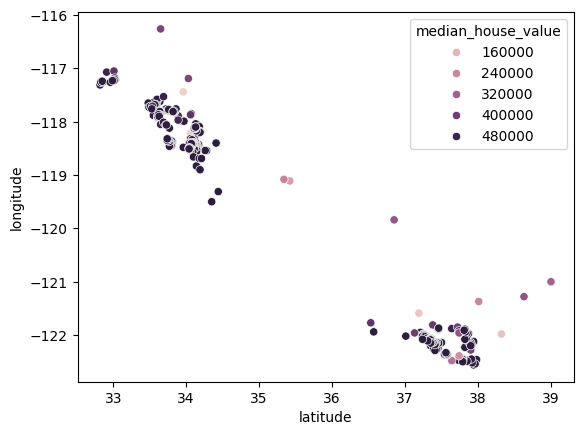

In [177]:
sb.scatterplot(x="latitude", y="longitude", data=df[(df.median_income>10)], hue="median_house_value")


**Campi vuoti o nulli**

Il sistema più rapido è quello di eliminare la colonna... oppure di usare dropna() per eliminare le righe con dati nulli. 
Sarebbe meglio preservare i dati.

In [178]:
#per indicare quali "celle" hanno un valore NaN
df.isna().head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [179]:
#quanti valori NaN ci sono?
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Elimino la colonna con i valori nulli

In [180]:
#ricavo il nome delle colonne con valori nulli
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
cols_with_missing

['total_bedrooms']

In [181]:
df_red1 = df.drop(cols_with_missing, axis=1)
df_red1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   population          20640 non-null  float64
 5   households          20640 non-null  float64
 6   median_income       20640 non-null  float64
 7   median_house_value  20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


**Imputation** Usiamo Pandas per sostituire i valori mancanti (Nan con 0)

In [182]:
# Sostituzione dei valori NaN con 0

#su tutta la tabella
dfna = df.fillna(0) 

#su una sola colonna
dftemp = df
dftemp['total_bedrooms'] = dftemp['total_bedrooms'].fillna(0)
dftemp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [183]:
df2 = df.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Imputation 2**: Aggiungo i dati mancanti. Cerco le colonne Nan e le sostituisco con 0 o con il valore medio.

In [196]:
# Calcolo della media della colonna 'A' (ignorando i NaN)
dftemp = df
mean_value = dftemp['total_bedrooms'].mean()
print("media: ", mean_value)

# Sostituzione dei NaN in 'A' con la media
dftemp['total_bedrooms'] = dftemp['total_bedrooms'].fillna(mean_value)
dftemp.head()

media:  532.47621124031


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Colonna MISSING_VALUE** Sostituisco i valori NAN con uno 0 e aggiungo una colonna che dice che il campo in questione non è valido.

In [197]:
dftemp = df
dftemp['bedrooms_is_valid'] = ~dftemp['total_bedrooms'].isna()
dftemp['total_bedrooms'] = dftemp['total_bedrooms'].fillna(0)
dftemp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_is_valid
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,True
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,True
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,True
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,True
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,True


**Dummies / One-Hot Encoding**
Uno dei campi presenta delle "etichette" e non è adatto alle elaborazioni. Il campo va convertito in tante colonne quante sono le etichette. 

In [184]:
df2["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [185]:
dummies = pd.get_dummies(df2["ocean_proximity"], dtype=int)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [186]:
#unisco le colonne dummies al dataframe
df3 = df2.join(dummies)


In [187]:
df3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [188]:
df4 = df3.drop(["ocean_proximity"], axis=1)
df4.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


**Valori Non Numerici**: Puoi trovare le righe di una colonna che contengono valori non convertibili in numero utilizzando la funzione pd.to_numeric() con l'opzione errors='coerce'. Questa funzione tenta di convertire i valori in numeri e sostituisce quelli non convertibili con NaN. Successivamente, puoi identificare tali righe.



In [198]:
data = {
    'col1': ['10', '20', 'abc', '30', 'NaN', '40.5', 'xyz'],
    'col2': [1, 2, 3, 4, 5, 6, 7]
}
dfx = pd.DataFrame(data)

# Trova i valori non convertibili in numero nella colonna 'col1'
non_numeric_rows = dfx[pd.to_numeric(dfx['col1'], errors='coerce').isna()]

print("\nRighe con valori non convertibili in numeri:")
print(non_numeric_rows)



Righe con valori non convertibili in numeri:
  col1  col2
2  abc     3
4  NaN     5
6  xyz     7


**Convertire il tipo di un campo**
Es. ho una colonna con numeri in formato testuale...

**Rinomino colonne**

In [189]:
# DataFrame di esempio
dfx = pd.DataFrame({
    'col1': [1, 2, 3],
    'col2': [4, 5, 6]
})

# Rinomina 'col1' in 'nuova_col1'
dfx.rename(columns={'col1': 'nuova_col1'}, inplace=True)

dfx.head()

,nuova_col1,col2
0,1,4
1,2,5
2,3,6


In [190]:
# Cambia il nome della seconda colonna
dfx.columns.values[1] = 'colonna2'

dfx.head()

,nuova_col1,colonna2
0,1,4
1,2,5
2,3,6


#### Dati da SQL

#### Dati da MongoDB

#### Dati da Excel

### Evidenzio le relazioni tra i dati
il metodo corr() fornisce una mappa di valutazione delle correlazioni tra i valori.
I valori positivi e vicini a 1.00 indicano correlazione forte (direttamente proporzionale). Se la correlazione è 0, significa che non ci sono dei legami. Se il valore è negativo (al max -1.0) il legame è di proporzionalità inversa.

In [191]:
df4.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.016785,-0.004964,-0.004128,-0.019043,0.000055
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.016785,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


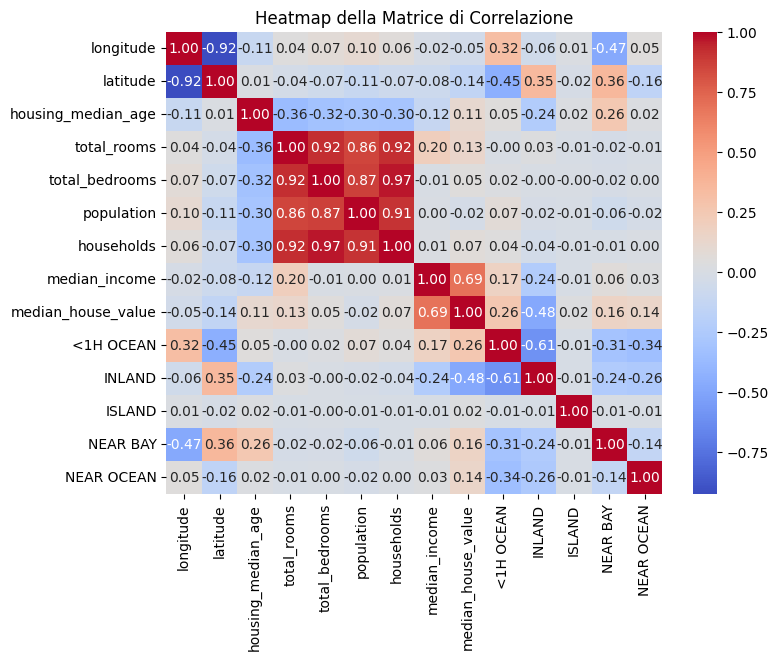

In [192]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sb.heatmap(df4.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Heatmap della Matrice di Correlazione")
plt.show()

A me interessa maggiormente il comportamento e le relazioni del valore delle case per capire da cosa sono influenzate

In [193]:
df4.corr()["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049148
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64